# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,310,90,50,90,188,61,10,181,36,21,158,211,492,220,69,6,19,191,199
1,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184
2,86,89,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200
3,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
4,76,91,39,83,170,60,8,172,38,21,134,197,445,152,72,0,10,188,194
5,809,79,38,55,120,55,5,142,48,19,128,153,295,145,81,4,2,180,183
6,14,94,49,79,203,71,5,174,37,21,154,196,465,206,71,6,2,197,199
7,164,98,54,104,186,59,10,213,32,24,172,223,665,217,73,1,26,186,195
8,370,96,41,77,177,64,5,177,36,21,134,205,485,148,74,0,4,196,198
9,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.413479,93.244080,44.602914,81.358834,166.795993,61.378871,8.489982,167.704918,41.338798,20.519126,147.424408,187.688525,434.806922,173.788707,72.848816,6.191257,12.528233,188.653916,195.202186
std,242.177934,8.118566,6.201224,15.897729,33.314174,8.259831,4.761692,34.181519,8.059200,2.677648,14.633984,32.618278,182.052258,32.967621,7.863392,4.884229,8.848153,6.309280,7.682875
min,0.000000,76.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,39.000000,69.000000,140.000000,56.000000,6.000000,146.000000,34.000000,19.000000,136.000000,166.000000,314.000000,148.000000,68.000000,2.000000,6.000000,184.000000,189.000000
50%,422.000000,92.000000,44.000000,79.000000,165.000000,61.000000,8.000000,155.000000,43.000000,19.000000,145.000000,177.000000,356.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,625.000000,99.000000,49.000000,96.000000,193.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,215.000000,573.000000,195.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,110.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
X_train = X_train[:, 1:] #because first feature was column of indexes
X_test = X_test[:, 1:]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [6]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

l_reg = LogisticRegression(tol=1e-3, solver='saga', multi_class='multinomial', max_iter=500)

params_grid = [
    {'penalty': ['l1', 'l2', 'elaticnet', 'none'],
    'C': np.logspace(-4, 4, 20)}
]

clf = GridSearchCV(l_reg, param_grid = params_grid, cv=4, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   10.8s finished


In [7]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)

In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print('F1-score: ', f1_score(y_test, best_clf.predict(X_test), average=None))
print('Accuracy: ', accuracy_score(y_test, best_clf.predict(X_test)))

F1-score:  [0.83116883 0.5112782  0.6097561  0.8951049 ]
Accuracy:  0.7138047138047138


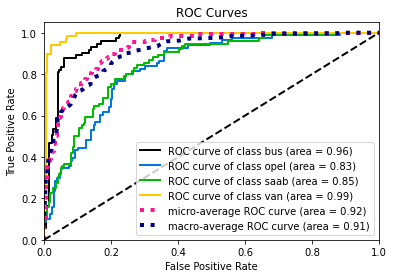

In [9]:
import scikitplot.metrics as splt
import matplotlib.pyplot as plt

splt.plot_roc(y_test, best_clf.predict_proba(X_test))
plt.show()

We found that optimal C = 0.615 \
Low F1-score for saab and opel classes means that they are badly separated from the other classes.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

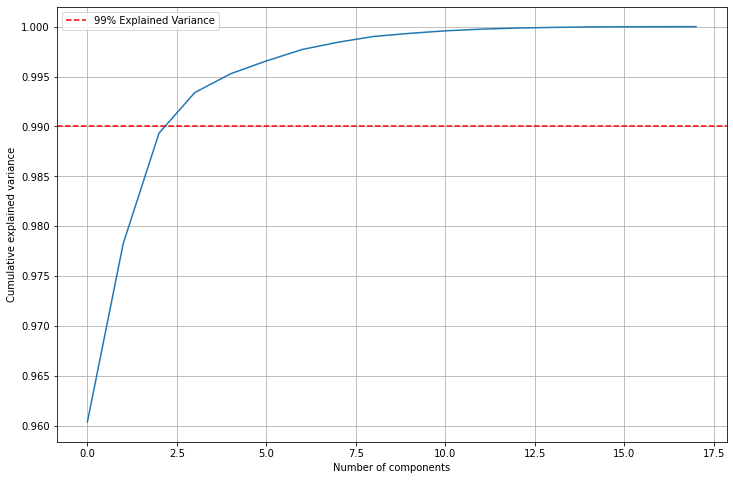

In [10]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.axhline(y = 0.99, color='r', linestyle='--', label = '99% Explained Variance')
plt.legend(loc='best')
plt.grid()

We can notice that at components = 13 we exactly cover the entire range.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

When we apply PCA, we must always normalize the data. Pre-normalization is needed to reasonably select the metric in which the directions of greatest dispersion will be searched for. To avoid data leak I will use Pipeline here.

In [11]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA(n_components=13)
log_reg = LogisticRegression(tol=1e-3, solver='saga', multi_class='multinomial')

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('pca', pca),
    ('logreg', log_reg)
])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Here I will use Pipeline from 2.3 

In [12]:
### YOUR CODE HERE

params_grid = [
    {'logreg__penalty': ['l1', 'l2', 'elaticnet', 'none'],
    'logreg__C': np.logspace(-4, 4, 20),
     'logreg__max_iter': [100, 300, 500, 1000, 1500]
    }
]

clf = GridSearchCV(pipeline, param_grid = params_grid, cv=3, verbose=True, n_jobs=-1)
best_pca = clf.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   11.3s finished


In [13]:
best_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=13)),
                ('logreg',
                 LogisticRegression(C=29.763514416313132, max_iter=300,
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [14]:
print('F1-score: ', f1_score(y_test, best_pca.predict(X_test), average=None))
print('Accuracy: ', accuracy_score(y_test, best_pca.predict(X_test)))

F1-score:  [0.8951049  0.64864865 0.68639053 0.97014925]
Accuracy:  0.7912457912457912


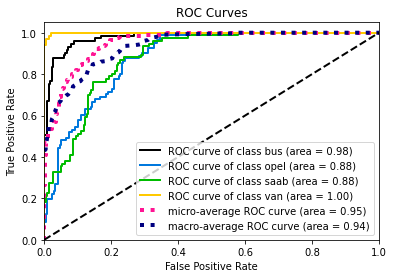

In [15]:
splt.plot_roc(y_test, best_pca.predict_proba(X_test))
plt.show()

We found that optimal constant in LogReg on PCA-preprocessed data is C = 29 \
You can also notice an increase in accuracy score in comparison with the LogReg on the untouched data and we saved resources for model training.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
dtree = DecisionTreeClassifier()

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('tree', dtree)
])

params_grid = [
    {'tree__max_depth': [2, 4, 6, 8, 10, 20, 30, 50]}
]

clf = GridSearchCV(pipeline, param_grid = params_grid, verbose=True, n_jobs=-1)
best_tree = clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [20]:
best_tree.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(max_depth=8))])

In [21]:
print('F1-score: ', f1_score(y_test, best_tree.predict(X_test), average=None))
print('Accuracy: ', accuracy_score(y_test, best_tree.predict(X_test)))

F1-score:  [0.86486486 0.40298507 0.56842105 0.81967213]
Accuracy:  0.6565656565656566


We found that best model has max_depth = 8 

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

--- This is not true. When we train a single decision tree, we pick up hyperparameters for it so that it does not overfit, while in bagging we use overfitted trees for small bias.

We won't use CV below so we can transform our dataset with Scaler without Pipeline.

In [22]:
# YOUR CODE HERE
import warnings
warnings.filterwarnings(action = 'ignore')
from tqdm import tqdm
from sklearn.ensemble import BaggingClassifier

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

f1 = []
f1_weighted = []
accr = []

for i in tqdm(np.arange(2, 100, 5)):
    log_reg = LogisticRegression(tol=1e-3, solver='saga', multi_class='multinomial')
    bag_clf = BaggingClassifier(base_estimator = log_reg, n_estimators = i)
    bag_clf.fit(X_train_scale, y_train)
    
    f1.append(f1_score(y_test, bag_clf.predict(X_test_scale), average=None))
    f1_weighted.append(f1_score(y_test, bag_clf.predict(X_test_scale), average='weighted'))
    accr.append(accuracy_score(y_test, bag_clf.predict(X_test_scale)))

100%|██████████████████████████████████████████████████████████████| 20/20 [00:24<00:00,  1.22s/it]


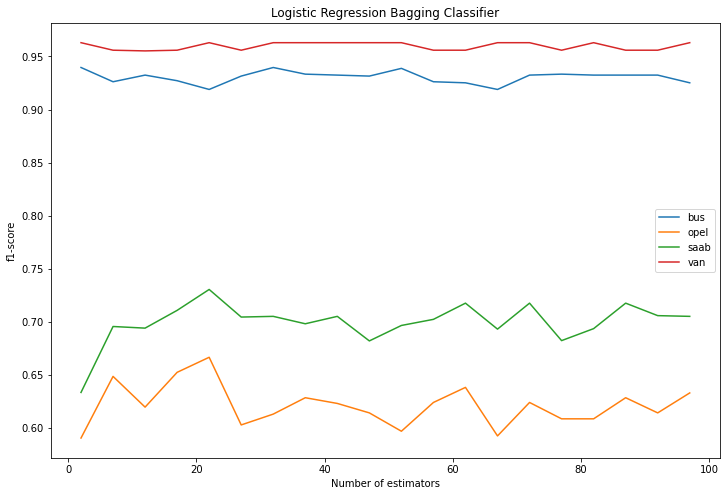

In [23]:
f1 = np.array(f1)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(2, 100, 5), f1[:, i], label=name[i])
    
plt.xlabel('Number of estimators')
plt.ylabel('f1-score')
plt.title('Logistic Regression Bagging Classifier')
plt.legend()
plt.show()

In [24]:
print('Best weighted F1 score was reached on n_estimators =', np.arange(2,100,5)[f1_weighted.index(max(f1_weighted))])

Best weighted F1 score was reached on n_estimators = 22


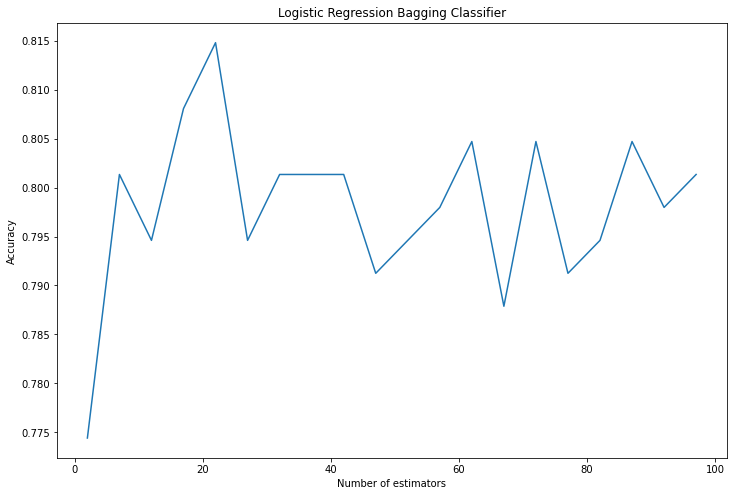

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 100, 5), accr)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Bagging Classifier')
plt.show()

In [26]:
print('Best accuracy score was reached on n_estimators =', np.arange(2,100,5)[accr.index(max(accr))])
print('Best accuracy = ', max(accr))

Best accuracy score was reached on n_estimators = 22
Best accuracy =  0.8148148148148148


In [32]:
f1 = []
f1_weighted = []
accr = []

for i in tqdm(np.arange(2, 100, 5)):
    des_tree = DecisionTreeClassifier()
    bag_clf = BaggingClassifier(base_estimator = des_tree, n_estimators = i)
    bag_clf.fit(X_train_scale, y_train)
    
    f1.append(f1_score(y_test, bag_clf.predict(X_test_scale), average=None))
    f1_weighted.append(f1_score(y_test, bag_clf.predict(X_test_scale), average='weighted'))
    accr.append(accuracy_score(y_test, bag_clf.predict(X_test_scale)))

100%|██████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.80it/s]


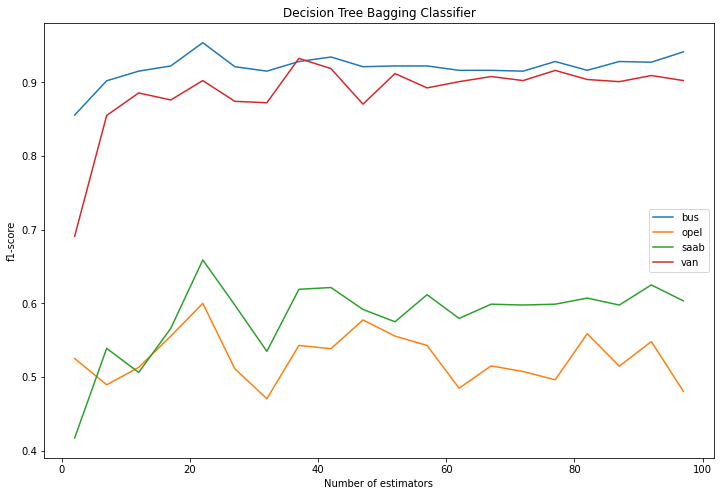

In [33]:
f1 = np.array(f1)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(2, 100, 5), f1[:, i], label=name[i])
    
plt.xlabel('Number of estimators')
plt.ylabel('f1-score')
plt.title('Decision Tree Bagging Classifier')
plt.legend()
plt.show()

In [34]:
print('Best weighted F1 score was reached on n_estimators =', np.arange(2,100,5)[f1_weighted.index(max(f1_weighted))])

Best weighted F1 score was reached on n_estimators = 22


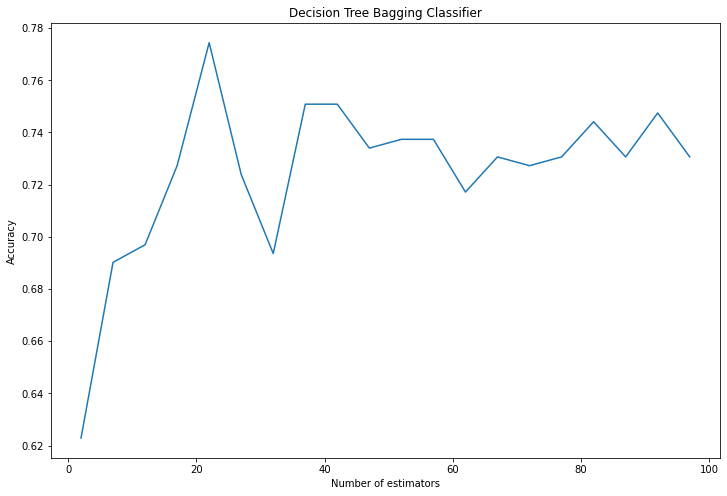

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 100, 5), accr)
plt.xlabel('Number of estimators')
plt.title('Decision Tree Bagging Classifier')
plt.ylabel('Accuracy')
plt.show()

In [36]:
print('Best accuracy score was reached on n_estimators =', np.arange(2,100,5)[accr.index(max(accr))])
print('Best accuracy = ', max(accr))

Best accuracy score was reached on n_estimators = 22
Best accuracy =  0.7744107744107744


Аfter analyzing the graphs we can see that ~20 is the optimal number of algorithms for decision tree classifier, because after that value metrics start vary greatly, and don't grow on average. \
In Logistic Regression Classifier we can see the same situation.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
f1 = []
f1_weighted = []
accr = []

for i in tqdm(np.arange(1, 101)):
    best_rndm_frst = RandomForestClassifier(n_estimators = i)
    best_rndm_frst.fit(X_train_scale, y_train)
    
    f1.append(f1_score(y_test, best_rndm_frst.predict(X_test_scale), average=None))
    f1_weighted.append(f1_score(y_test, best_rndm_frst.predict(X_test_scale), average='weighted'))
    accr.append(accuracy_score(y_test, best_rndm_frst.predict(X_test_scale)))

100%|████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.19it/s]


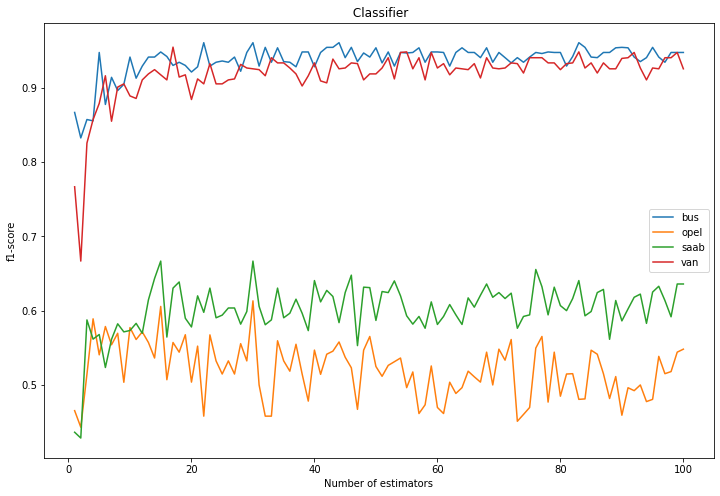

In [38]:
f1 = np.array(f1)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(1,101), f1[:, i], label=name[i])
    
plt.xlabel('Number of estimators')
plt.ylabel('f1-score')
plt.title(' Classifier')
plt.legend()
plt.show()

In [39]:
print('Best weighted f1 score was reached on n_estimators =', np.arange(1,101)[f1_weighted.index(max(f1_weighted))])

Best weighted f1 score was reached on n_estimators = 30


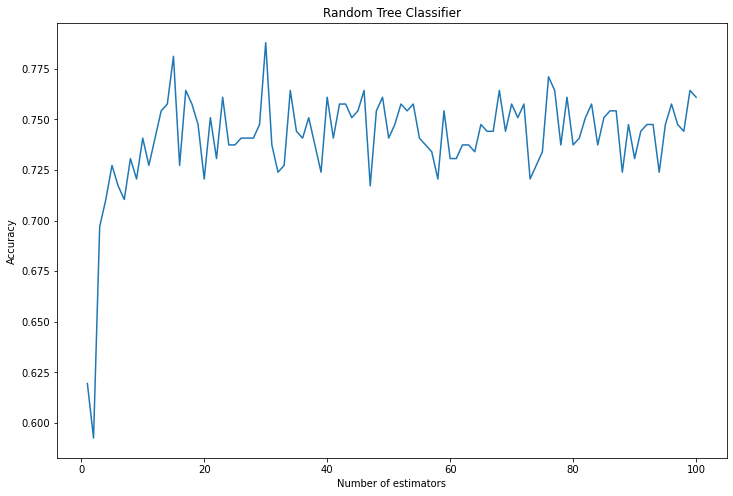

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, 101), accr)
plt.xlabel('Number of estimators')
plt.title('Random Tree Classifier')
plt.ylabel('Accuracy')
plt.show()

In [41]:
print('Best accuracy score was reached on n_estimators =', np.arange(1,101)[accr.index(max(accr))])
print('Best accuracy = ', max(accr))

Best accuracy score was reached on n_estimators = 30
Best accuracy =  0.7878787878787878


Аfter analyzing the graphs  we can see that ~30-40 is the optimal number of trees, because after that value metrics start vary greatly, and don't grow on average.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [52]:
# YOUR CODE HERE
logreg = LogisticRegression(C=0.615848, max_iter=500, multi_class='multinomial', penalty='l1', solver='saga', tol=0.001)
dectree = DecisionTreeClassifier(max_depth=8)
rndmf = RandomForestClassifier(n_estimators = 40)

parts = 10
f1_lr = []
f1_dt = []
f1_rf = []
accr_lr = []
accr_dt = []
accr_rf = []

for i in np.arange(1, parts + 1):
    xtrain_part = X_train_scale[:55 * i]
    ytrain_part = y_train[:55 * i]
    
    logreg.fit(xtrain_part, ytrain_part)
    dectree.fit(xtrain_part, ytrain_part)
    rndmf.fit(xtrain_part, ytrain_part)
    
    f1_lr.append(f1_score(y_test, logreg.predict(X_test_scale), average=None))
    f1_dt.append(f1_score(y_test, dectree.predict(X_test_scale), average=None))
    f1_rf.append(f1_score(y_test, rndmf.predict(X_test_scale), average=None))
    
    accr_lr.append(accuracy_score(y_test, logreg.predict(X_test_scale)))
    accr_dt.append(accuracy_score(y_test, dectree.predict(X_test_scale)))
    accr_rf.append(accuracy_score(y_test, rndmf.predict(X_test_scale)))

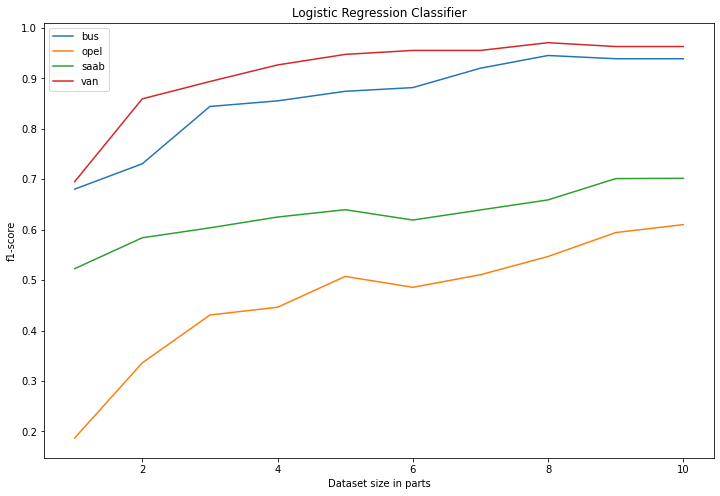

In [53]:
f1_lr = np.array(f1_lr)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(1, parts + 1), f1_lr[:, i], label=name[i])
    
plt.xlabel('Dataset size in parts')
plt.ylabel('f1-score')
plt.title('Logistic Regression Classifier')
plt.legend()
plt.show()

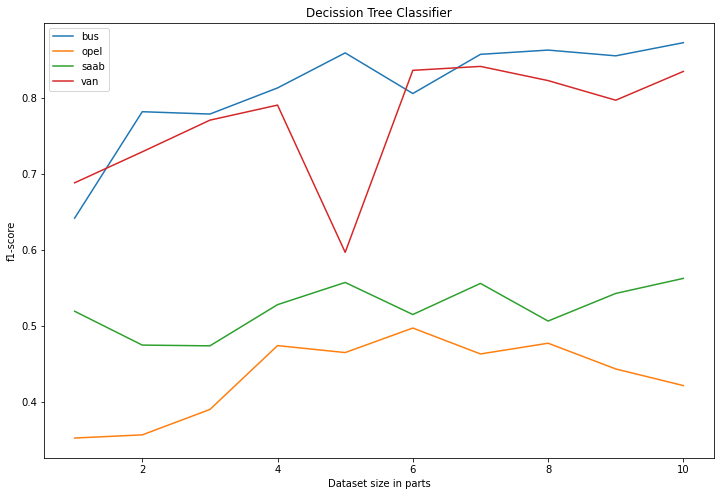

In [54]:
f1_dt = np.array(f1_dt)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(1, parts + 1), f1_dt[:, i], label=name[i])
    
plt.xlabel('Dataset size in parts')
plt.ylabel('f1-score')
plt.title('Decission Tree Classifier')
plt.legend()
plt.show()

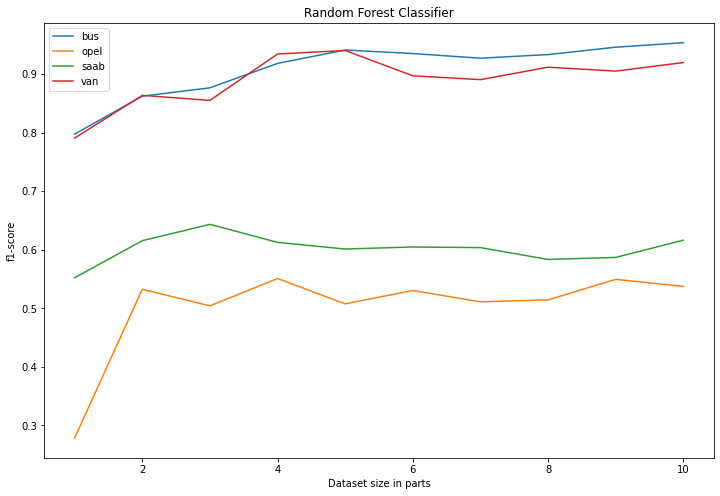

In [55]:
f1_rf = np.array(f1_rf)
name = ['bus', 'opel', 'saab' , 'van']
plt.figure(figsize=(12, 8))

for i in np.arange(4):
    plt.plot(np.arange(1, parts + 1), f1_rf[:, i], label=name[i])
    
plt.xlabel('Dataset size in parts')
plt.ylabel('f1-score')
plt.title('Random Forest Classifier')
plt.legend()
plt.show()

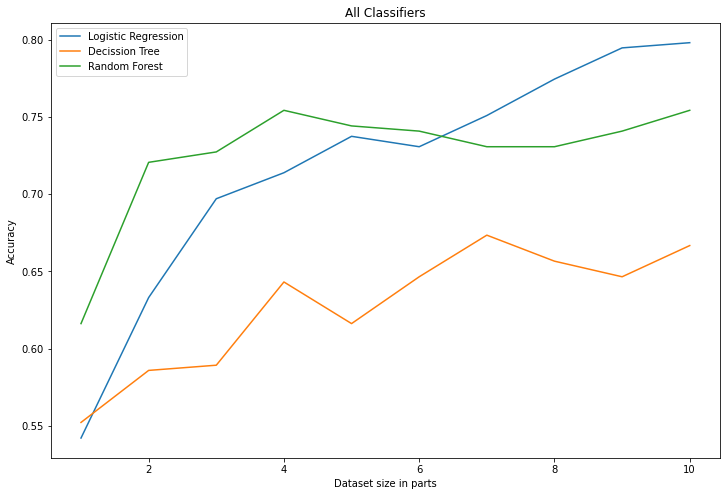

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, parts + 1), accr_lr, label='Logistic Regression')
plt.plot(np.arange(1, parts + 1), accr_dt, label='Decission Tree')
plt.plot(np.arange(1, parts + 1), accr_rf, label='Random Forest')
plt.xlabel('Dataset size in parts')
plt.title('All Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that the accuracy score grows with the increase in the amount of dataset. The Random Forest classifier has smoother growth than the Decision Tree and Logistic Regression classifiers.